# Load the Scanner

In [1]:
from ahoi_root import load_from_dir

Welcome to JupyROOT 6.18/04


After you ran a scan, you can load a project directly from the created directory. All results and actions are available via the `ahoi.Scanner` class. This example assumes you have run the `onebin.py` example script before.

In [2]:
# create the `ahoi.Scanner` object for the project
scn = load_from_dir("onebin")

In [3]:
scn

Scanner instance with options:

baseline_selections:
- '1'
bin_cuts:
- '1'
cuts:
- - - name
    - var1
  - - varexp
    - var1
  - - values
    - - -3
      - -2
      - -1
      - 0
      - 1
      - 2
      - 3
  - - comparator
    - '>'
  - - type_name
    - double
- - - name
    - var1_upper
  - - varexp
    - var1
  - - values
    - - -3
      - -2
      - -1
      - 0
      - 1
      - 2
      - 3
  - - comparator
    - <
  - - type_name
    - double
- - - name
    - var2
  - - varexp
    - var2
  - - values
    - - -3
      - -2
      - -1
      - 0
      - 1
      - 2
      - 3
  - - comparator
    - '>'
  - - type_name
    - double
- - - name
    - var2_upper
  - - varexp
    - var2
  - - values
    - - -3
      - -2
      - -1
      - 0
      - 1
      - 2
      - 3
  - - comparator
    - <
  - - type_name
    - double
- - - name
    - var3
  - - varexp
    - var3
  - - values
    - - -3
      - -2
      - -1
      - 0
      - 1
      - 2
      - 3
  - - comparator
    - '>'


# Inspect the result

ahoi gives you arrays with the yields (sum of weights) square of MC stat error (sum of squares of weights) and the raw number of events. The following functions return arrays of the length of number of cut combinations (in the example, many of them will be 0). 

In [4]:
scn.ncombinations

5764801

In [5]:
scn.get_yields("bkg", number_type="sumw")

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
scn.get_yields("bkg", number_type="sumw2")

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
scn.get_yields("bkg", number_type="n")

array([0, 0, 0, ..., 0, 0, 0])

those are a bit to many to look at all of them - so lets select those that lie on a "ROC curve". That means for certain ranges (bins) of signal efficiency (e.g 100 ranges between 0 and 1) we choose the cut combination that has the lowest amount of background. Note that when we don't pass an `i_subset` argument we will get the first subset. The subsets are meant to cross check the yields on statistically independend subsets to avoid optimising on statistical fluctuations. For signal efficiency bins where no cut combination falls into the values for signal and background efficiencies are set to `nan`

In [8]:
effs, effb, cut_indices = scn.get_ROC_curve()

In [9]:
effs

array([0.01064184, 0.02095111, 0.03026272, 0.04955105, 0.05520452,
       0.06418357, 0.07748587, 0.08446957, 0.09311606, 0.10475557,
       0.11173928, 0.1240439 , 0.13501829, 0.142002  , 0.15164616,
       0.16262055, 0.17492517, 0.1849019 , 0.19122049, 0.20651812,
       0.21050881, 0.22613901, 0.2347855 , 0.24276688, 0.25839707,
       0.26005986, 0.27569006, 0.28067842, 0.29231792, 0.30362488,
       0.31426671, 0.32158297, 0.33255737, 0.34253409, 0.35816428,
       0.36248753, 0.37712005, 0.38044563, 0.39541071, 0.40139674,
       0.41170602, 0.42068507, 0.43664782, 0.44063851, 0.45294313,
       0.46025939, 0.47256402, 0.48553375, 0.49384769, 0.50681743,
       0.51213834, 0.52510808, 0.5374127 , 0.54173595, 0.55670103,
       0.56102428, 0.571001  , 0.58829398, 0.59261723, 0.60957765,
       0.61489857, 0.62021949, 0.63252411, 0.64316595, 0.65979381,
       0.66012637, 0.67741935, 0.68074493, 0.69670768, 0.7043565 ,
       0.71666112, 0.72031926, 0.73594945, 0.7402727 , 0.75024

In [10]:
effb

array([0.00000000e+00, 3.32557366e-04, 9.97672098e-04, 1.33022946e-03,
       1.33022946e-03, 3.99068839e-03, 6.65114732e-03, 6.98370469e-03,
       7.98137679e-03, 8.64649152e-03, 8.97904889e-03, 1.06418357e-02,
       1.09743931e-02, 1.16395078e-02, 1.29697373e-02, 1.29697373e-02,
       1.59627536e-02, 1.66278683e-02, 1.86232125e-02, 1.69604257e-02,
       1.76255404e-02, 3.52510808e-02, 3.52510808e-02, 5.88626538e-02,
       5.45394080e-02, 5.45394080e-02, 5.52045228e-02, 5.75324243e-02,
       5.78649817e-02, 6.35184569e-02, 6.38510143e-02, 6.45161290e-02,
       6.48486864e-02, 7.94812105e-02, 7.81509810e-02, 7.68207516e-02,
       7.71533089e-02, 7.78184237e-02, 7.81509810e-02, 7.88160958e-02,
       8.01463252e-02, 8.77951447e-02, 9.21183904e-02, 1.06085800e-01,
       1.09411373e-01, 1.15064849e-01, 1.02427669e-01, 1.03092784e-01,
       1.02760226e-01, 1.03425341e-01, 1.03757898e-01, 1.04423013e-01,
       1.07748587e-01, 1.08413701e-01, 1.15397406e-01, 1.16062521e-01,
      

In [11]:
cut_indices

array([ 436231,  247573,  361400,  393985,  360371, 2951058, 2010887,
        363801, 2953459,  482830,  363851, 2010544,  363458,  362773,
        366252,  363508,  365908, 2012995, 2014759,  365909,  365272,
        486359,  485330, 1220657, 2164552, 2164553,  483852,  486254,
        481500, 2161808,  514722, 2128194,  481108,  536773, 1205566,
       2164209,  517123,  516437,  483509,  482824,  481207,  486303,
        486352, 1307438, 1307487, 1343502, 2164258, 2164259,  517172,
        517173,  483558,  483559,  483608,  482922,  486009,  485323,
       2281221,  634821,  634135,  601207,  600521, 1340709, 1340758,
        634136,  618015,  601208, 1323951, 1326303, 1326352, 1323216,
       1323265, 1306458, 1325666,  485316, 1424743, 1443951, 1457672,
       1441207, 1440864, 1441551, 1426507, 1441600, 1460122, 1440865,
       1444001, 1440914,  600564, 1560915, 1443315, 1426508,  600900,
       1544157,  620108,  603301,  737757,  737414,  720607,      -1,
            -1])

plot the ROC curve

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'background rejection')

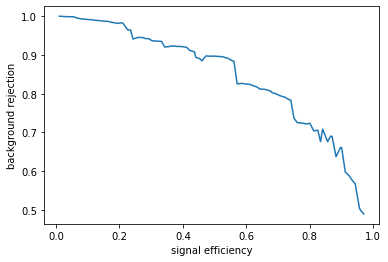

In [13]:
plt.plot(effs, 1-effb)
plt.xlabel("signal efficiency")
plt.ylabel("background rejection")

## Now lets print information for the best cut combination at signal efficiency = 0.5

In [14]:
import math

In [15]:
index_05 = cut_indices[(effs >= 0.5) & (effs < 0.51)][0]

<ipython-input-15-f52533b057bd>:1: RuntimeWarning: invalid value encountered in greater_equal
  index_05 = cut_indices[(effs >= 0.5) & (effs < 0.51)][0]
<ipython-input-15-f52533b057bd>:1: RuntimeWarning: invalid value encountered in less
  index_05 = cut_indices[(effs >= 0.5) & (effs < 0.51)][0]


In [16]:
index_05

517173

In [17]:
# yields for process named "bkg"
scn.get_yields("bkg")[index_05]

311.0

In [18]:
# yields for all processes in signal category
scn.get_sum_yields(*scn.sig_process_names)[index_05]

45.72000000000097

In [19]:
# total yields for all processes in background category
scn.get_sum_yields(*scn.bkg_process_names)[index_05]

311.0

In [20]:
# total mc stat error for all processes in background category
math.sqrt(scn.get_sum_yields(*scn.bkg_process_names, number_type="sumw2")[index_05])

17.635192088548397

In [21]:
# show the cut expression one would need for TTree::Draw
scn.get_cut_expr(index_05)

'var1>-3&&var1<1&&var2>-1&&var2<2&&var3>-1&&var3<2&&var4>0&&var4<3'

In [22]:
# Run TTree::Draw for cross check
# Note that this might now give ~twice the number since this does not split into subsets
# This will return n, sumw, sumw2 (in this example they are all the same)
scn.get_yields_draw("bkg", scn.get_cut_expr(index_05))

(615.0, 615.0, 615.0000000000001)

In [23]:
# for cross check sum the yields for both subsets
for number_type in ["n", "sumw", "sumw2"]:
    print(
        (
            scn.get_yields("bkg", i_subset=0, number_type=number_type)
            + scn.get_yields("bkg", i_subset=1, number_type=number_type)
        )[index_05]
    )

615
615.0
615.0
